In [ ]:
 # data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine


# import necessary libraries
import pandas as pd
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AI/stores"

csv_files = glob.glob(os.path.join(path, "*.csv"))
print(path)

/content/drive/MyDrive/AI/stores


In [ ]:
df_list = []

for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)

    df_list.append(df)
    """
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    """

result = pd.concat(df_list)
#print(df_list)

In [ ]:
result['Date'] = pd.to_datetime(result.Date)
train = pd.read_csv('/content/drive/MyDrive/AI/train.csv')
train['Date'] = pd.to_datetime(train.Date)

In [ ]:
merged_df = pd.merge(train, result,  how='inner', left_on=['Store','Date'], right_on=['Store','Date'])

In [ ]:
merged_df.head()

non_cat_df = merged_df.drop(['IsHoliday_x', 'IsHoliday_y', 'Date'], axis=1)
non_cat_df.head()

,Store,Dept,Weekly_Sales,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,24924.50,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
1,1,2,50605.27,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
2,1,3,13740.12,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
3,1,4,39954.04,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
4,1,5,32229.38,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833


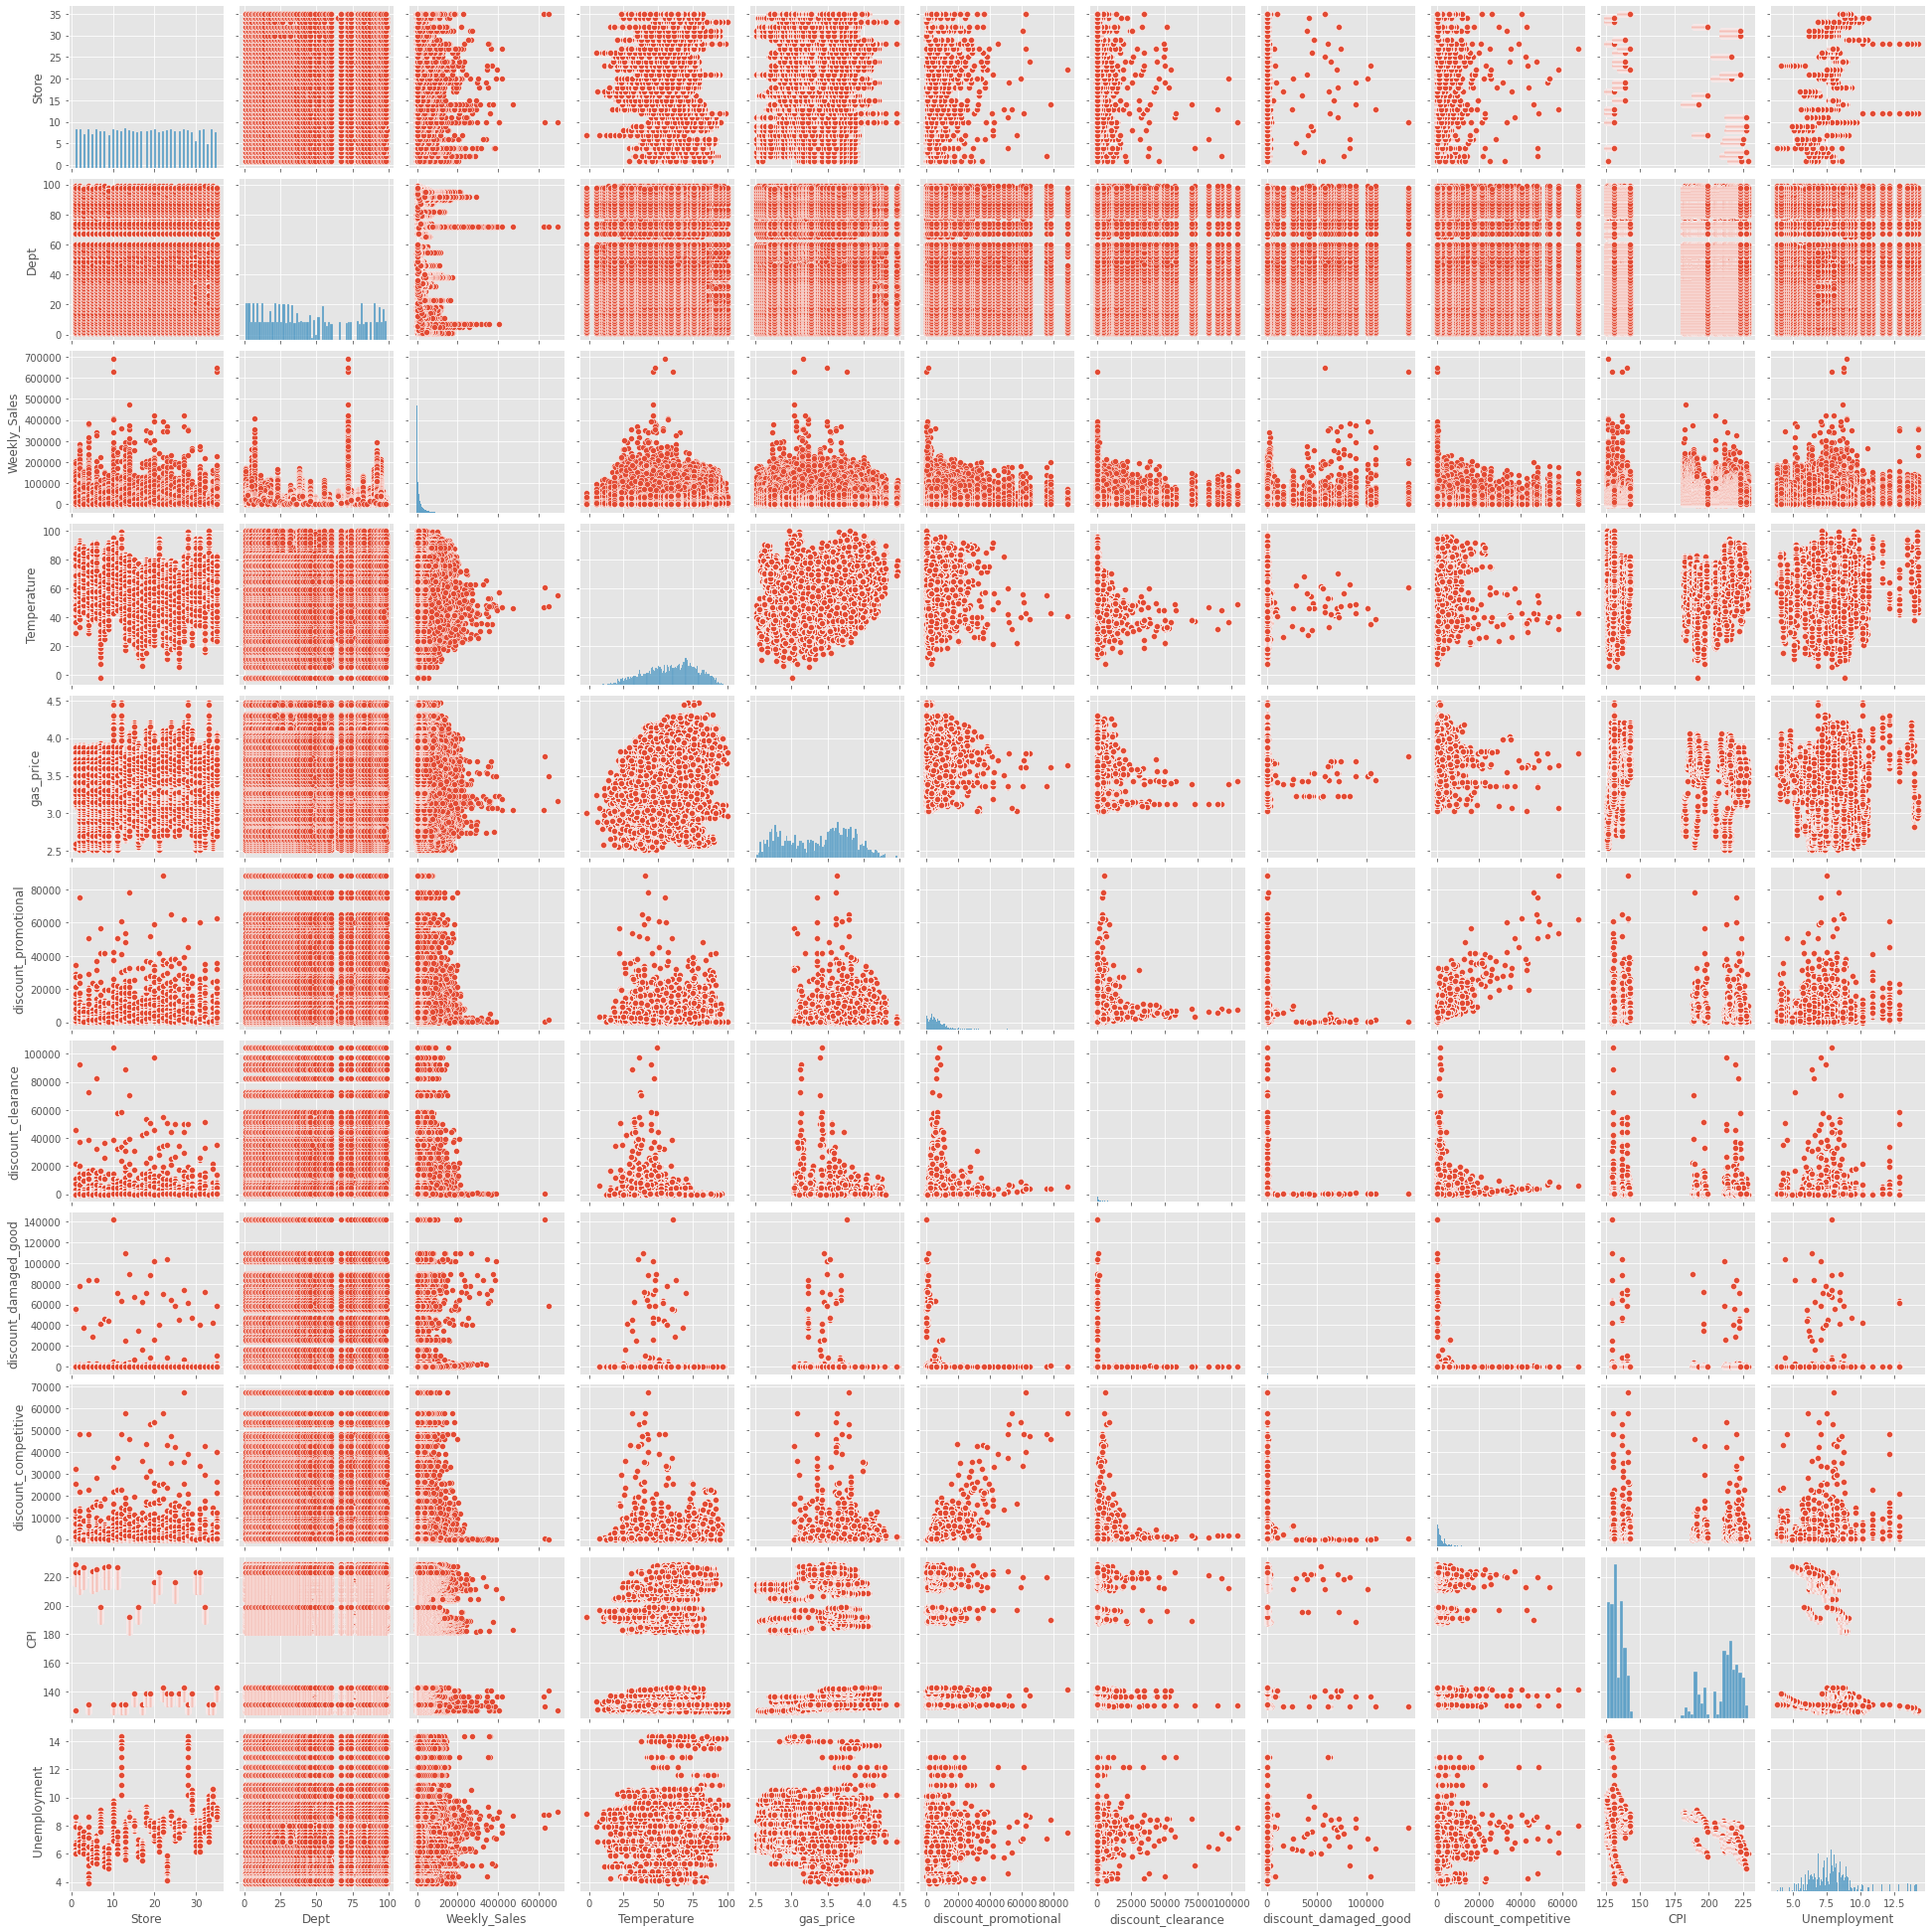

In [ ]:
sns.pairplot(non_cat_df)

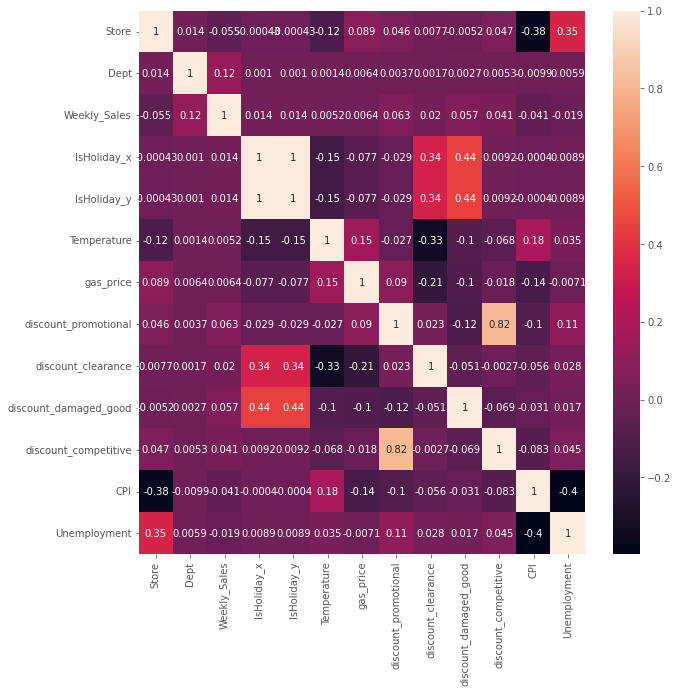

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(merged_df.corr(), annot = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340287 entries, 0 to 340286
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store                  340287 non-null  int64  
 1   Dept                   340287 non-null  int64  
 2   Weekly_Sales           340287 non-null  float64
 3   Temperature            340287 non-null  float64
 4   gas_price              340287 non-null  float64
 5   discount_promotional   127337 non-null  float64
 6   discount_clearance     98863 non-null   float64
 7   discount_damaged_good  117213 non-null  float64
 8   discount_competitive   123013 non-null  float64
 9   CPI                    339369 non-null  float64
 10  Unemployment           339369 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 39.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f073a406650>,
      dtype=object)

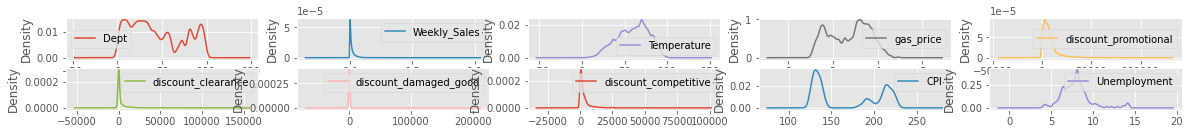

In [ ]:
non_cat_df.info()
non_cat_df.iloc[:, 1:].plot.density(subplots=True, layout= (11, 5), figsize=(20, 10), sharex = False)


In [ ]:
#To pick first 10 stores

store_options = [x for x in range(1, 11)] 
#print(store_options)

#merged_df.head() 


first_10_stores = merged_df.loc[merged_df['Store'].isin(store_options)] 
print(first_10_stores.count())

Store                    97839
Dept                     97839
Date                     97839
Weekly_Sales             97839
IsHoliday_x              97839
IsHoliday_y              97839
Temperature              97839
gas_price                97839
discount_promotional     40592
discount_clearance       31377
discount_damaged_good    37377
discount_competitive     39992
CPI                      96921
Unemployment             96921
dtype: int64


In [ ]:
#To pick top 35% departments in the first 10 stores
group_by_store_department = first_10_stores.groupby(['Store', 'Dept']).agg({'Weekly_Sales':sum})
top_35_depts_in_each_store = group_by_store_department.sort_values(['Store', 'Weekly_Sales'],ascending=False).groupby(['Store']).head(35)

print(top_35_depts_in_each_store)


            Weekly_Sales
Store Dept              
10    72     20410926.56
      2      15700726.68
      40     14280921.17
      38     12593725.11
      8      12403798.07
...                  ...
1     3       1880518.36
      55      1832951.60
      98      1691371.22
      74      1666354.32
      34      1648908.93

[350 rows x 1 columns]


In [ ]:

"""
This is to add additional columns in the first_10_stores dataframe

---Do not execute again and remove this
"""

first_10_stores['week'] = first_10_stores['Date'].dt.isocalendar().week

first_10_stores['year'] = pd.DatetimeIndex(first_10_stores['Date']).year

first_10_stores['month'] = pd.DatetimeIndex(first_10_stores['Date']).month

first_10_stores['month_year'] = first_10_stores['month'].astype(str) + "-" + first_10_stores['year'].astype(str)
first_10_stores['week_year'] = first_10_stores['week'].astype(str) + "-" + first_10_stores['year'].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
group_by_week_year_department = first_10_stores.groupby(['Store', 'Dept','week_year']).agg({'Weekly_Sales':sum})
group_by_week_year_department.head(50)


Weekly_Sales
Store Dept week_year              
1     1    1-2011         15984.24
           1-2012         16567.69
           10-2010        21043.39
           10-2011        21280.40
           10-2012        21140.07
           11-2010        22136.64
           11-2011        20334.23
           11-2012        22366.88
           12-2010        26229.21
           12-2011        20881.10
           12-2012        22107.70
           13-2010        57258.43
           13-2011        20398.09
           13-2012        28952.86
           14-2010        42960.91
           14-2011        23873.79
           14-2012        57592.12
           15-2010        17596.96
           15-2011        28762.37
           15-2012        34684.21
           16-2010        16145.35
           16-2011        50510.31
           16-2012        16976.19
           17-2010        16555.11
           17-2011        41512.39
           17-2012        16347.60
           18-2010        17413.94
           18-2011        20138.19
           18-2012        17147.44
           19-2010        18926.74
           19-2011        17235.15
           19-2012        18164.20
           2-2011         17359.70
           2-2012         16894.40
           20-2010        14773.04
           20-2011        15136.78
           20-2012        18517.79
           21-2010        15580.43
           21-2011        15741.60
           21-2012        16963.55
           22-2010        17558.09
           22-2011        16434.15
           22-2012        16065.49
           23-2010        16637.62
           23-2011        15883.52
           23-2012        17666.00
           24-2010        16216.27
           24-2011        14978.09
           24-2012        17558.82
           25-2010        16328.72

In [ ]:
#Best department in each store
best_dept_in_each_store = group_by_store_department.sort_values(['Store', 'Weekly_Sales'],ascending=False).groupby(['Store']).head(1)
best_dept_in_each_store

,,Weekly_Sales
Store,Dept,
10,72,20410926.56
9,38,11184287.78
8,95,9002059.31
7,72,6447844.96
6,92,14160545.90
5,38,7893570.24
4,92,22789210.43
3,38,15529566.07
2,92,23572153.03


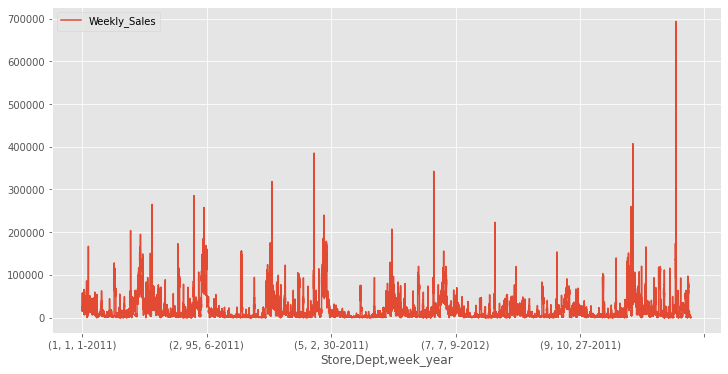

In [ ]:
group_by_week_year_department.plot()

Store  Dept
1      1       AxesSubplot(0.125,0.125;0.775x0.755)
       2       AxesSubplot(0.125,0.125;0.775x0.755)
       3       AxesSubplot(0.125,0.125;0.775x0.755)
       4       AxesSubplot(0.125,0.125;0.775x0.755)
       5       AxesSubplot(0.125,0.125;0.775x0.755)
                               ...                 
10     94      AxesSubplot(0.125,0.125;0.775x0.755)
       95      AxesSubplot(0.125,0.125;0.775x0.755)
       96      AxesSubplot(0.125,0.125;0.775x0.755)
       97      AxesSubplot(0.125,0.125;0.775x0.755)
       98      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Weekly_Sales, Length: 756, dtype: object

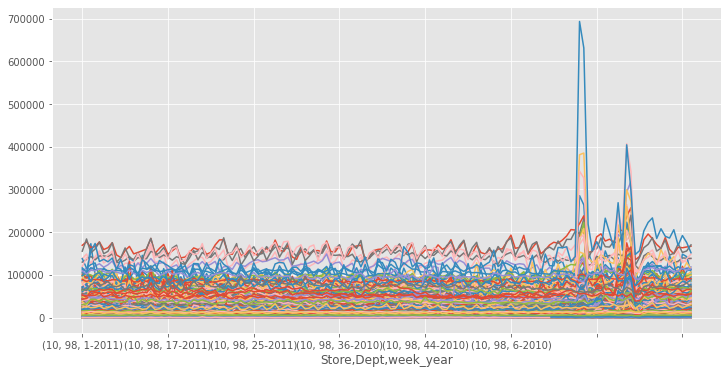

In [ ]:
group_by_week_year_department.groupby(['Store', 'Dept'])['Weekly_Sales'].plot()

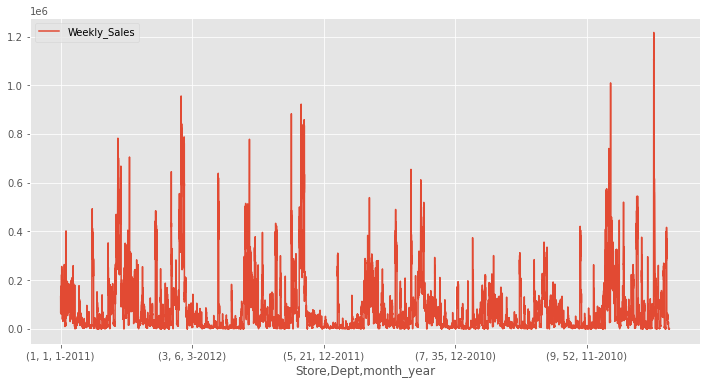

In [ ]:
group_by_month_year_department = first_10_stores.groupby(['Store', 'Dept','month_year']).agg({'Weekly_Sales':sum})
group_by_month_year_department.head(50)

group_by_month_year_department.plot(legend=True)

month_year
1-2011     AxesSubplot(0.125,0.125;0.775x0.755)
1-2012     AxesSubplot(0.125,0.125;0.775x0.755)
10-2010    AxesSubplot(0.125,0.125;0.775x0.755)
10-2011    AxesSubplot(0.125,0.125;0.775x0.755)
10-2012    AxesSubplot(0.125,0.125;0.775x0.755)
11-2010    AxesSubplot(0.125,0.125;0.775x0.755)
11-2011    AxesSubplot(0.125,0.125;0.775x0.755)
12-2010    AxesSubplot(0.125,0.125;0.775x0.755)
12-2011    AxesSubplot(0.125,0.125;0.775x0.755)
2-2010     AxesSubplot(0.125,0.125;0.775x0.755)
2-2011     AxesSubplot(0.125,0.125;0.775x0.755)
2-2012     AxesSubplot(0.125,0.125;0.775x0.755)
3-2010     AxesSubplot(0.125,0.125;0.775x0.755)
3-2011     AxesSubplot(0.125,0.125;0.775x0.755)
3-2012     AxesSubplot(0.125,0.125;0.775x0.755)
4-2010     AxesSubplot(0.125,0.125;0.775x0.755)
4-2011     AxesSubplot(0.125,0.125;0.775x0.755)
4-2012     AxesSubplot(0.125,0.125;0.775x0.755)
5-2010     AxesSubplot(0.125,0.125;0.775x0.755)
5-2011     AxesSubplot(0.125,0.125;0.775x0.755)
5-2012     AxesSubplot(0.125,

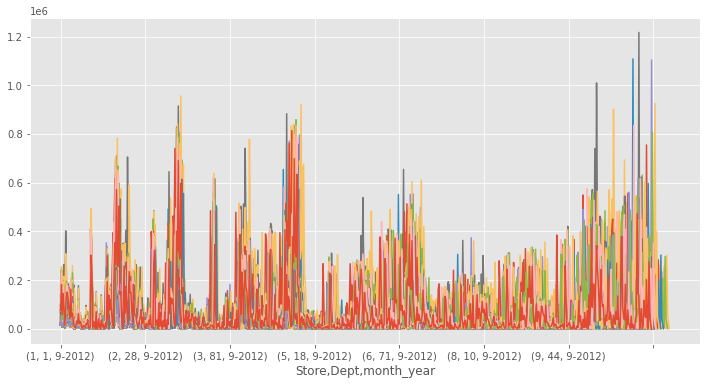

In [ ]:
group_by_week_year_department.groupby(['week_year'])['Weekly_Sales'].plot()
group_by_month_year_department.groupby(['month_year'])['Weekly_Sales'].plot()

In [ ]:
  merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,IsHoliday_y,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,False,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
1,1,2,2010-02-05,50605.27,False,False,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
2,1,3,2010-02-05,13740.12,False,False,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
3,1,4,2010-02-05,39954.04,False,False,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833
4,1,5,2010-02-05,32229.38,False,False,59.33,3.36,9667.5,268.29,0.6,8368.15,223.659114,6.833


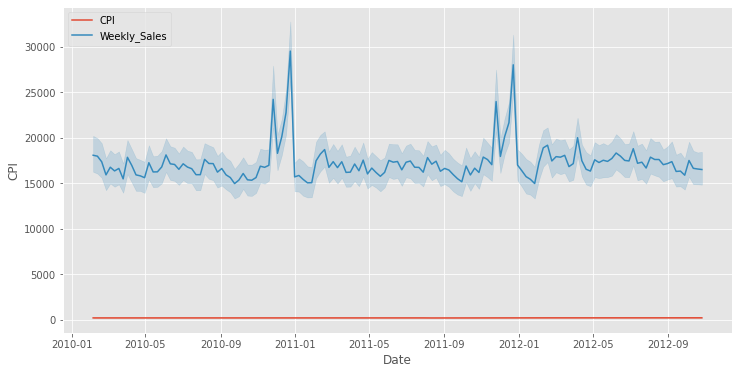

In [ ]:
#CPI vs weekly sals

import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

dataFrame = df

#cpi_umemp = first_10_stores.groupby('CPI').agg({'Weekly_Sales':sum})
#cpi_umemp.plot()

sb.lineplot(x="Date", y="CPI", data = first_10_stores, label="CPI")
sb.lineplot(x="Date", y="Weekly_Sales", data = first_10_stores, label="Weekly_Sales")

plt.legend(loc="upper left")


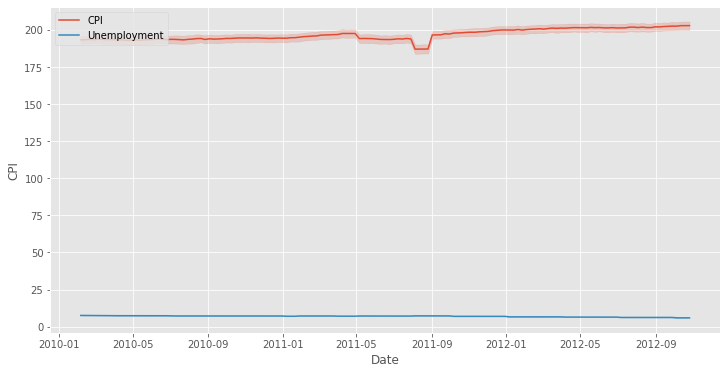

In [ ]:
#Unemployment vs weekly sales

import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

dataFrame = df

#cpi_umemp = first_10_stores.groupby('CPI').agg({'Weekly_Sales':sum})
#cpi_umemp.plot()

sb.lineplot(x="Date", y="CPI", data = first_10_stores, label="CPI")
sb.lineplot(x="Date", y="Unemployment", data = first_10_stores, label="Unemployment")

plt.legend(loc="upper left")


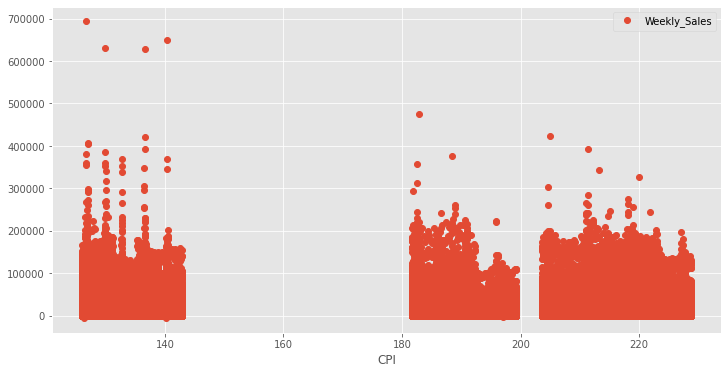

In [ ]:
merged_df.plot(x='CPI', y='Weekly_Sales', style='o')

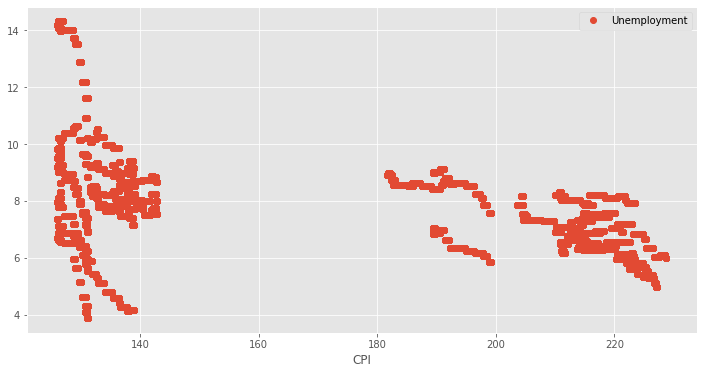

In [ ]:
merged_df.plot(x='CPI', y='Unemployment', style='o')

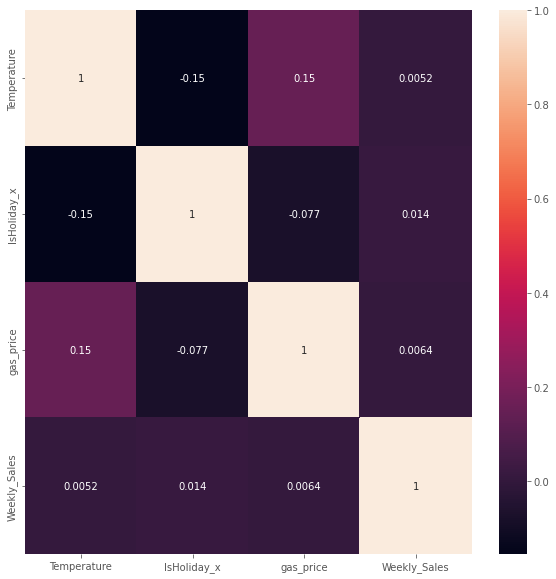

In [ ]:
#E.	Identify the products which are highly impacted by external factors: “temperature”, “gas price”, and “holiday”. Is there any correlation between overall sales and holiday?
plt.figure(figsize = (10, 10))
sns.heatmap(merged_df[['Temperature','IsHoliday_x','gas_price','Weekly_Sales']].corr(), annot = True)

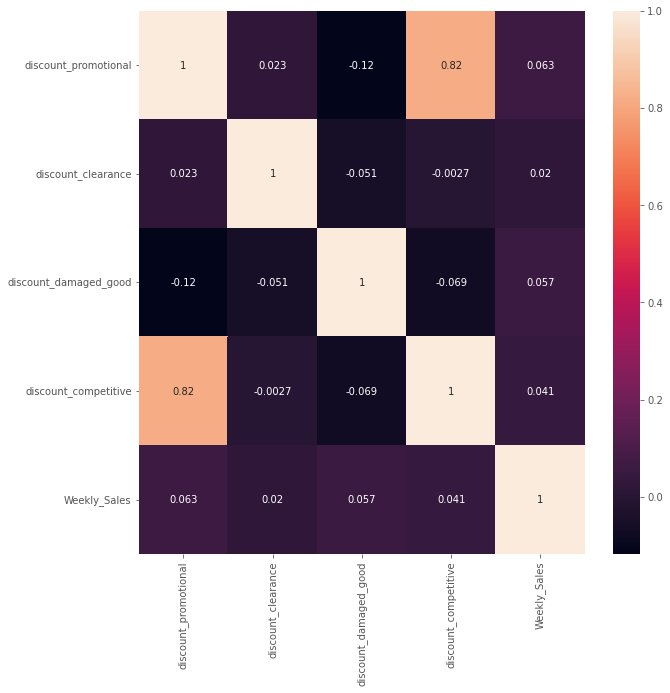

In [ ]:
#D.	Investigate the impact of various hold types of discounts, for example, discount promotional, discount clearance, discount damaged good, discount competitive and discount employee on the overall sales.
#D.1.	Which type of discount is helpful in increasing the sales? Consider top 30% of the best performing stores (sales per 1000 square feet).
#D.2.	Does the observed behavior hold true for all the stores? Consider bottom 30% of the least performing store (sales per 1000 square feet).


plt.figure(figsize = (10, 10))
sns.heatmap(merged_df[['discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','Weekly_Sales']].corr(), annot = True)